In [1]:
# Trabalho 1

# O problema será identificar se o sinal de sonar obtido (60 valores reais,
# correspondentes a energia em diferentes bandas de frequência e ângulos de retorno) representa
# uma rocha (“R”) ou uma mina (“M”)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
train_df = pd.read_csv('sonar.train-data', header=None)
test_df  = pd.read_csv('sonar.test-data', header=None) 

In [4]:
#train_df.head()
train_df.shape

(145, 61)

In [5]:
#test_df.head()
test_df.shape

(63, 61)

In [6]:
# Replacing char values by numerical ones
cleanup_nums = {60: {"M": 1.0, "R": 0.0}}

train_df.replace(cleanup_nums, inplace=True)
test_df.replace(cleanup_nums, inplace=True)

print (train_df.head())
print (test_df.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0264  0.0071  0.0342  0.0793  0.1043  0.0783  0.1417  0.1176  0.0453   
1  0.0086  0.0215  0.0242  0.0445  0.0667  0.0771  0.0499  0.0906  0.1229   
2  0.0394  0.0420  0.0446  0.0551  0.0597  0.1416  0.0956  0.0802  0.1618   
3  0.0095  0.0308  0.0539  0.0411  0.0613  0.1039  0.1016  0.1394  0.2592   
4  0.0310  0.0221  0.0433  0.0191  0.0964  0.1827  0.1106  0.1702  0.2804   

       9  ...       51      52      53      54      55      56      57  \
0  0.0945 ...   0.0214  0.0262  0.0177  0.0037  0.0068  0.0121  0.0077   
1  0.1185 ...   0.0072  0.0054  0.0022  0.0016  0.0029  0.0058  0.0050   
2  0.2558 ...   0.0146  0.0040  0.0114  0.0032  0.0062  0.0101  0.0068   
3  0.3745 ...   0.0181  0.0019  0.0102  0.0133  0.0040  0.0042  0.0030   
4  0.4432 ...   0.0204  0.0059  0.0053  0.0079  0.0037  0.0015  0.0056   

       58      59   60  
0  0.0078  0.0066  1.0  
1  0.0024  0.0030  0.0  
2  0.0053  0.0087

In [7]:
# Describing the database
#train_df[60].value_counts()
print(train_df.iloc[:,:-1].describe())
print(test_df.iloc[:,:-1].describe())

               0           1           2           3           4           5   \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.029547    0.037821    0.043738    0.054526    0.079002    0.110829   
std      0.022255    0.034114    0.039538    0.048730    0.059642    0.063264   
min      0.003600    0.000600    0.001500    0.006100    0.006700    0.010200   
25%      0.015100    0.014900    0.019100    0.027200    0.039700    0.069000   
50%      0.023300    0.030000    0.034200    0.044500    0.064700    0.092900   
75%      0.035300    0.047400    0.054700    0.062700    0.107000    0.145200   
max      0.131300    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8          9      ...              50  \
count  145.000000  145.000000  145.000000  145.00000     ...      145.000000   
mean     0.122453    0.135608    0.181346    0.21665     ...        0.016110   
std      0.060247    0.081476 

In [8]:
# 145 samples from train/validation dataframe(~70%) + 63 samples from test dataframe (~30%) =  208 samples
X_train = train_df.iloc[:,:-1].values   # Independent variables
y_train = train_df.iloc[:, -1].values   # Dependent variables (classes)

X_test = test_df.iloc[:,:-1].values     # Independent variables
y_test = test_df.iloc[:, -1].values     # Dependent variables (classes)
print ('X_train shape:', X_train.shape)
print ('y_train shape:', y_train.shape)
print ('X_test shape:', X_test.shape)
print ('y_test shape:', y_test.shape)
print(type(X_train))
print(type(y_train))
print(X_train)
print(y_train)

X_train shape: (145, 60)
y_train shape: (145,)
X_test shape: (63, 60)
y_test shape: (63,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[0.0264 0.0071 0.0342 ... 0.0077 0.0078 0.0066]
 [0.0086 0.0215 0.0242 ... 0.005  0.0024 0.003 ]
 [0.0394 0.042  0.0446 ... 0.0068 0.0053 0.0087]
 ...
 [0.0202 0.0104 0.0325 ... 0.0054 0.0073 0.0054]
 [0.0269 0.0383 0.0505 ... 0.0027 0.0055 0.0057]
 [0.0261 0.0266 0.0223 ... 0.0021 0.0028 0.0023]]
[1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1.]


---

Epoch 0 Error: 65.000 Accuracy: 55.172 (%)
Epoch 1000 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2000 Error: 22.000 Accuracy: 84.828 (%)
Epoch 3000 Error: 19.000 Accuracy: 86.897 (%)
Epoch 4000 Error: 20.000 Accuracy: 86.207 (%)
Epoch 5000 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6000 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7000 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8000 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9000 Error: 18.000 Accuracy: 87.586 (%)
Epoch 10000 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11000 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12000 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13000 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14000 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15000 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16000 Error: 13.000 Accuracy: 91.034 (%)
Epoch 17000 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18000 Error: 14.000 Accuracy: 90.345 (%)
Epoch 19000 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20000 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21000 Error: 6.000 Accu

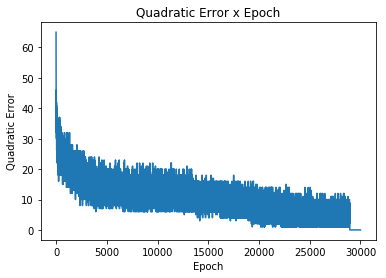

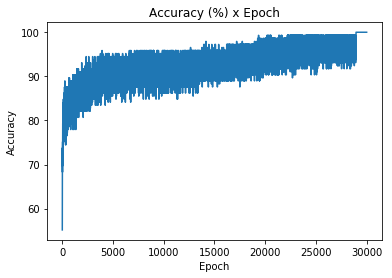

Weights:
[  9.58063219   1.15990255 -15.30244988  11.81141837  -4.05400333
   2.19269137 -13.93454208  -4.28135612   4.24316356   2.82593763
   2.02157238   9.62950586  -4.95468289  -2.89840304   3.57145124
  -2.37592346  -4.57450189   4.22094926   2.74302956  -3.34170404
   1.07225733   4.0602943   -3.67611596   7.50307708  -2.90106861
  -3.49157197   4.05837124  -2.87159365   2.90829743   3.33131376
  -7.32461211   3.95142149   1.83042464  -2.98761676   1.52709536
  -2.31738852  -2.91876853  -0.20762811   3.63843934  -5.31920415
   1.89815223   0.84284447   4.59911146  -2.07839599   2.88058575
   4.59422148 -12.09657034  17.05761627   8.61833916 -16.56628172
  18.29572165   6.82301514   9.73941684  10.1120992   -8.58280049
  -3.49498098  -1.67967577   3.07056626   5.21849832   5.39490315
  -4.86003176]
Confusion matrix on test database:
[[25  8]
 [ 7 23]]


In [9]:
class Neuron:
    
    # Constructor
    
    def __init__(self, n_inputs, lRate):
        self.lRate = lRate
        self.weights = np.random.rand(n_inputs + 1) * 0.2 - 0.1 # Num. features + 1 (bias)
    
    # Prediction

    def predict(self, inputs):
        activation = np.dot(np.append(inputs, 1.0), self.weights)
        return 1.0 if activation >= 0.0 else 0.0

    # Learn

    def learn(self, trainingSet_inputs, trainingSet_outputs, nEpoch):
        #weights = np.random.rand(61) * 0.2 - 0.1 # Num. features + 1 (bias)
        error_list = []
        accuracy_list = []
        for epoch in range(nEpoch):
            sumError = 0.0
            for inputs, output in zip(trainingSet_inputs, trainingSet_outputs) :
                prediction = self.predict(inputs)
                error = output - prediction
                sumError += error ** 2
                self.weights = self.weights + self.lRate * error * np.append(inputs, 1.0)
            error_list.append(sumError)
            accuracy = 100*(len(trainingSet_outputs)-sumError)/len(trainingSet_outputs)
            accuracy_list.append(accuracy)
            if epoch % 1000 == 0:
                print ('Epoch %d Error: %.3f Accuracy: %.3f (%%)' % (epoch,sumError, accuracy))
            
        plt.plot(error_list)
        plt.title('Quadratic Error x Epoch')
        plt.ylabel('Quadratic Error')
        plt.xlabel('Epoch')
        fig = plt.gcf() # stores figure to save it
        fig.savefig('error.png')
        plt.show()
        
        plt.plot(accuracy_list)
        plt.title('Accuracy (%) x Epoch')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        fig = plt.gcf() # stores figure to save it
        fig.savefig('accuracy.png')
        plt.show()
        
        return self.weights

# Main (Single neuron Perceptron)

lRate      = 0.04
nEpoch     = 30000
n_inputs   = len(X_train[0])
perceptron = Neuron(n_inputs, lRate)
weights    = perceptron.learn(X_train, y_train, nEpoch)
print ('Weights:\n{}'.format(weights))
y_pred = []
for row in X_test:
    y_pred.append(perceptron.predict(row))

cm = confusion_matrix(y_test, y_pred) 
print('Confusion matrix on test database:\n{}'.format(cm))

In [10]:
####################################### Visualização da Matriz de Confusão ######################################################

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Desejada')
    plt.xlabel('Classe Obtida')

Matriz de Confusão Normalizada
             precision    recall  f1-score   support

        0.0       0.78      0.76      0.77        33
        1.0       0.74      0.77      0.75        30

avg / total       0.76      0.76      0.76        63



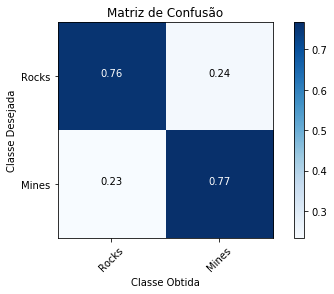

In [11]:
from sklearn import metrics
classes = ['Rocks', 'Mines']
plot_confusion_matrix(cm, classes, normalize=True)
print (metrics.classification_report(y_test, y_pred))

---